In [1]:
%load_ext autoreload

In [2]:
%autoreload

In [ ]:
from keras import utils
import matplotlib.pyplot as plt

from converter import Mc2RealConverter

In [4]:
mc2real = Mc2RealConverter()

2023-06-29 19:11:50.043020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-29 19:11:50.057995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-29 19:11:50.058128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
dataset = utils.image_dataset_from_directory(
    directory='data/1/minecraft',
    image_size=(256, 256),
    labels=None,
    batch_size=1,
)

Found 580 files belonging to 1 classes.


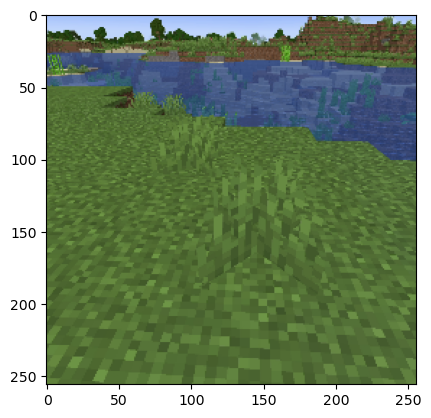

In [7]:
mc_image = next(iter(dataset))[0].numpy() / 255
plt.imshow(mc_image)

2023-06-29 19:12:04.770296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-06-29 19:12:05.071786: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-29 19:12:06.296236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-29 19:12:06.309669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [1,256,256,25]
	 [[{{node Placeholder/_1}}]]


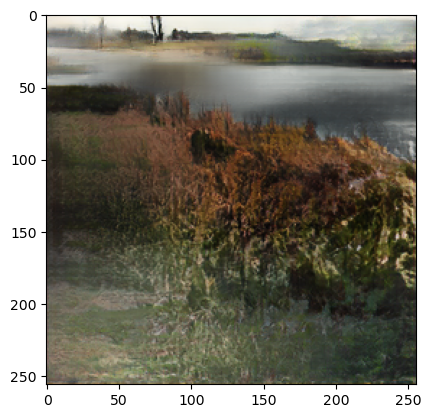

In [8]:
real_image = mc2real(mc_image)
plt.imshow(real_image)